- Text 빈도 분석(한글)  / bigkinds.or.kr
- 한글 패키지 konlpy 설치 (java 가 있어야함)
- jpype1 설치 전 jpype1.whl 파일 다운로드 필요 https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
- !python --version: 버전확인 / --force --reinstall : 강제 재설치 / --uparade pip (--user): pip upgrade 
- Okt() 생성 오류 시, jvm.py 파일 내용 변경 ('*'삭제)

In [3]:
!pip install konlpy
!pip install JPype1-1.3.0-cp38-cp38-win_amd64.whl

In [1]:
import json # json 파일을 다루기 위한
import re 
from konlpy.tag import Okt # 한글 품사(명사) tag
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc # plot에서 한글 사용
from wordcloud import WordCloud

In [2]:
# json file 로드하여 저장
fileName = 'C:/kyj/python/BigDataAnalysis/data/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json'
data = json.loads(open(fileName, 'r', encoding='utf8').read())

#  message 내용 중 문자나 숫자가 아닌것(r'[^\w]') 공백으로 치환 후 제거
message = ''
for item in data:
    if 'message' in item.keys():
        message = message + re.sub(r'[^\w]',' ',item['message'])+''
        
# message에서 명사인 단어만 추출
nlp = Okt()
message_N = nlp.nouns(message) 

# 빈도수 별로 count
count = Counter(message_N)

# 글자수가 1개 이상인 것만 word_count에 저장
word_count = dict()
for tag,counts in count.most_common(80):
    if(len(str(tag)) > 1):
       word_count[tag] = counts    

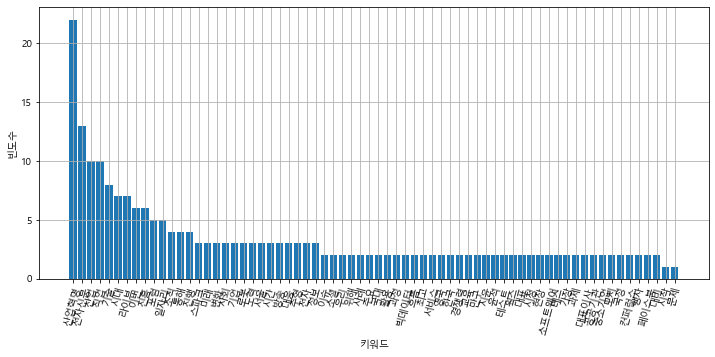

In [14]:
font_path = 'C:/Windows/fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)

plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True) 
sorted_Values = sorted(word_count.values(), reverse=True) 
plt.bar(range(len(word_count)), sorted_Values, align='center') # Y축 설정
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation ='75') # X축 설정
plt.show()

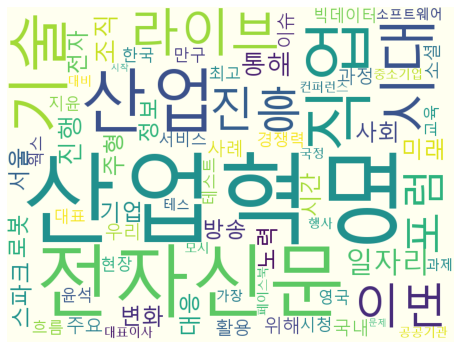

In [15]:
wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()